In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [96]:
#Question 5 How many rows and columns are in gdp_df? What are the data types of each column?
print(gdp_df.shape)
gdp_df.info()

(7662, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [6]:
#Question 6 : Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'},inplace=True)
gdp_df.drop(columns=['Value Footnotes'],inplace=True)

In [7]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


In [8]:
#Question 7 : How many countries have data for all years? Which countries are missing many years of data?
#Look at the number of observations per year. What do you notice?
gdp_countries = gdp_df.groupby('Country')
gdp_count = gdp_countries['Year'].count().sort_values()
print(gdp_count.to_string())

Country
Djibouti                                              10
Somalia                                               10
Turks and Caicos Islands                              12
Sint Maarten (Dutch part)                             14
Kosovo                                                15
Cayman Islands                                        16
Nauru                                                 19
Afghanistan                                           20
CuraÃ§ao                                              22
Palau                                                 22
SÃ£o TomÃ© and Principe                               22
Qatar                                                 23
Other small states                                    23
Timor-Leste                                           23
Liberia                                               23
Libya                                                 24
San Marino                                            25
Small states           

In [9]:
gdp_year = gdp_df.groupby('Year')
gdp_count2 = gdp_year['Country'].count().sort_values()
print(gdp_count2.to_string())

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2012    240
2011    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242


Q7 Observation : As the number goes up for the count of country by year the number only
goes up. Meaning once the country is in the dataset it stays but any missing data is from before it was entered.

Question 8: Show GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot

In [12]:
gdp_capita2020 = gdp_df[gdp_df['Year']==2020]
print(gdp_capita2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


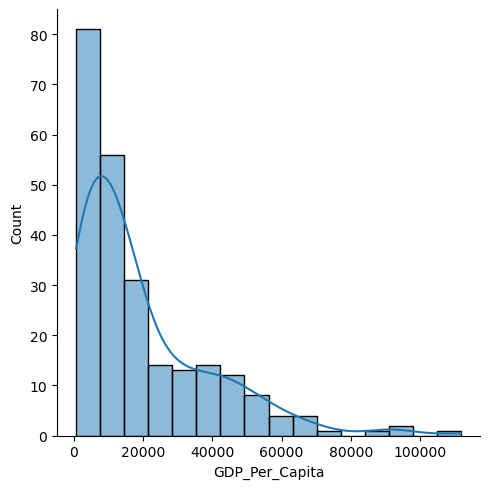

In [13]:
#Q8 Histogram
sns.displot( data=gdp_capita2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

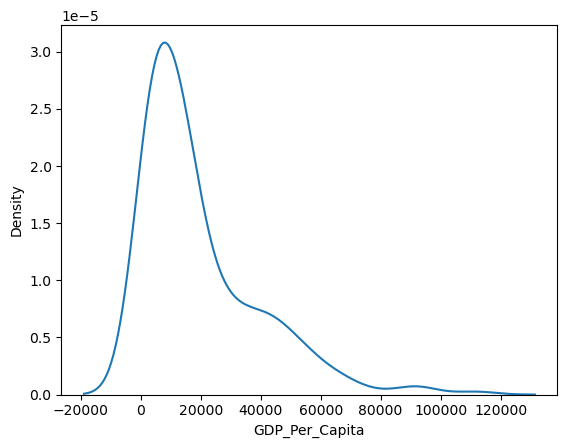

In [14]:
#Q8 Density Plot:
sns.kdeplot(gdp_capita2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

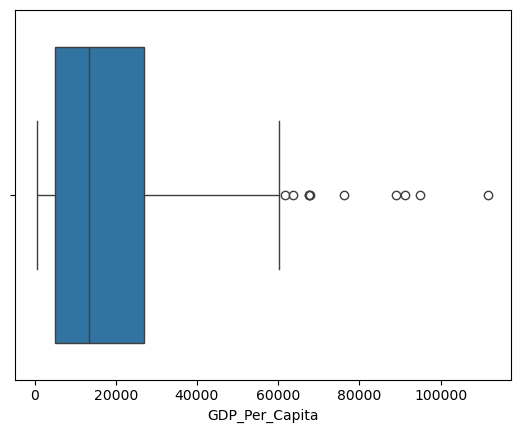

In [15]:
#Q8 Boxplot:
sns.boxplot( x=gdp_capita2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

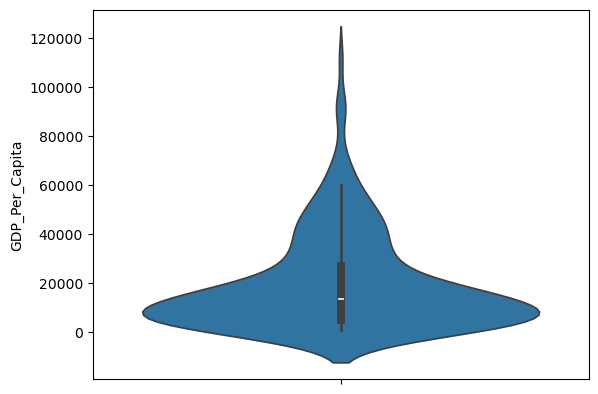

In [16]:
#Q8 Violin Plot:
sns.violinplot(y=gdp_capita2020["GDP_Per_Capita"])

Question 9: What was the median GDP per capita value in 2020?

In [18]:
gdp_capita2020['GDP_Per_Capita'].median()

13357.997573370474

Question 10: For this question, you're going to create some visualizations to compare GDP per capita values for the years
1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
Using this, create the following 4 plots:
A boxplot
A barplot (check out the Barplot with Seaborn sectio)
A scatterplot
A scatterplot with a trend line overlrn)

In [20]:
decades=(1990,2000,2010,2020)
gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

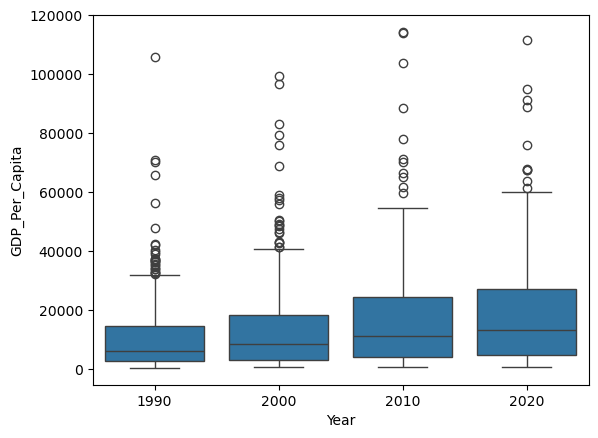

In [21]:
sns.boxplot(gdp_decades, x="Year", y="GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

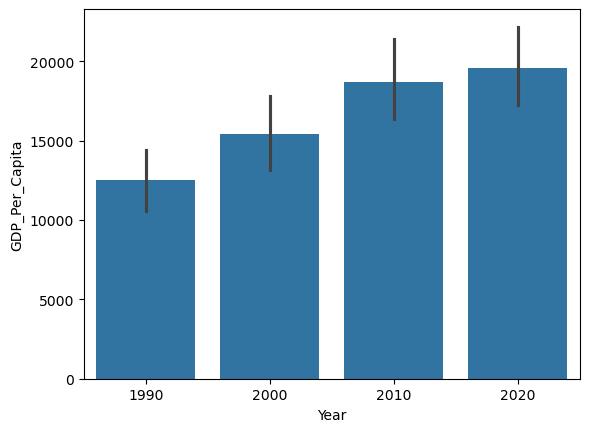

In [22]:
sns.barplot(data=gdp_decades, x="Year", y="GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

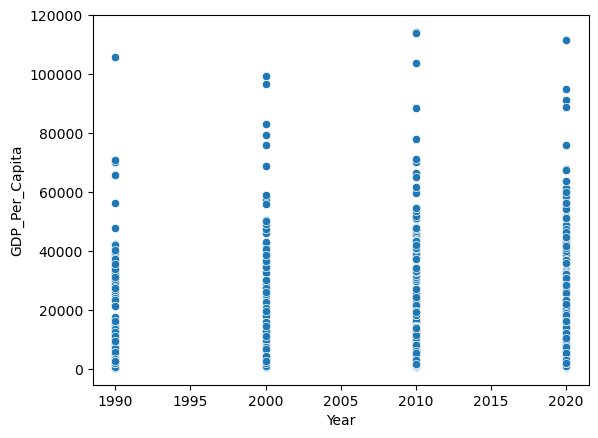

In [23]:
sns.scatterplot(data=gdp_decades, x="Year", y="GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

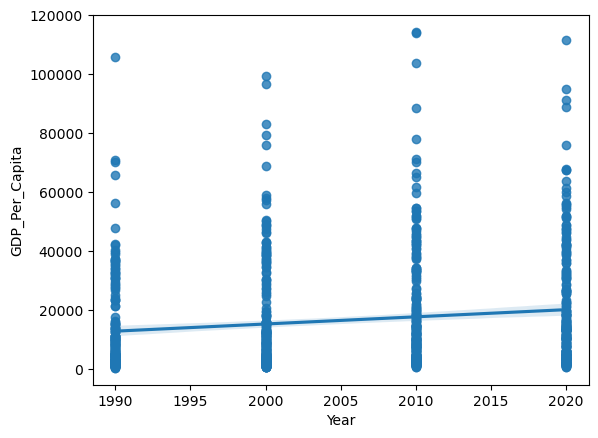

In [24]:
sns.regplot(data=gdp_decades, x="Year", y="GDP_Per_Capita")

Question 11: Which country was the first to have a GDP per capita greater than $100,000?

In [26]:
gdp_first100k = gdp_df[gdp_df['GDP_Per_Capita']>100000]
gdp_first100k.nsmallest(1, 'Year', keep='first')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


Question 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's
GDP per capita has changed over the timespan of the dataset.

In [28]:
gdp_topgdp2020 = gdp_df[gdp_df['Year']==2020]
gdp_topgdp2020.nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [29]:
gdp_df['Year']==2020

0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: Year, Length: 7662, dtype: bool

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

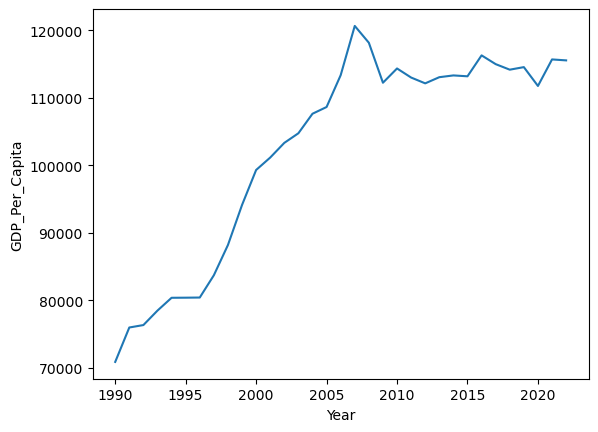

In [30]:
#Q12 Plot:
gdp_lburg = gdp_df[gdp_df['Country']=="Luxembourg"]
sns.lineplot(data=gdp_lburg, x="Year", y="GDP_Per_Capita")

Question 13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [32]:
gdp_lowgdp2020 = gdp_df[gdp_df['Year']==2020]
gdp_lowgdp2020.nsmallest(1, 'GDP_Per_Capita', keep='first')

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

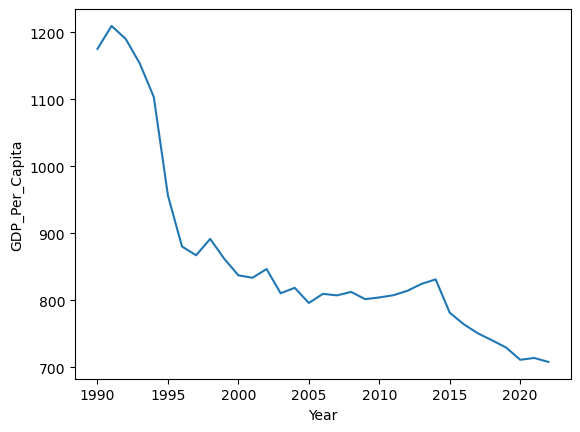

In [33]:
#Q13 Plot:
gdp_burundi = gdp_df[gdp_df['Country']=="Burundi"]
sns.lineplot(data=gdp_burundi, x="Year", y="GDP_Per_Capita")

Question 14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [35]:
internet_df = pd.read_csv('../data/internet_use.csv.csv',nrows=6083)
print(internet_df)

     Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN
6082        Zimbabwe  1990   0.000000             NaN

[6083 rows x 4 columns]


Question 15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [37]:
internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'},inplace=True)
internet_df.drop(columns=['Value Footnotes'],inplace=True)
#Question 6 : Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'
#gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'},inplace=True)
#gdp_df.drop(columns=['Value Footnotes'],inplace=True)

In [38]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739
6082     Zimbabwe  1990            0.000000

[6083 rows x 3 columns]


Question 16: Look at the number of observations in this dataset per year. What do you notice?

In [40]:
internet_df.groupby("Year")['Country'].count()
#From 1990 to 1991 the value shoots down by a large number. The values then go up with a little fluctuation up until 2008
#where it starts to go down again with a little fluctuation. Then the last year is 11? There could be something wrong or missing with the data?

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Country, dtype: int64

Question 17: What is the first year to have a non-zero internet users percentage value?

In [42]:
intusers_firstnonzero = internet_df[internet_df['Internet_Users_Pct']>0]
intusers_firstnonzero.nsmallest(1, 'Year', keep='first')

,Country,Year,Internet_Users_Pct
306,Australia,1990,0.585095


Question 18: How does the distribution of internet users percent differ for 2000 and 2014?

In [44]:
decades=(2000,2014)
internet_decades = internet_df[internet_df['Year'].isin(decades)]
print(internet_decades.to_string())

                                             Country  Year  Internet_Users_Pct
5                                        Afghanistan  2014            7.000000
28                                           Albania  2014           54.300000
42                                           Albania  2000            0.114097
57                                           Algeria  2014           29.500000
71                                           Algeria  2000            0.491706
87                                           Andorra  2014           86.100000
100                                          Andorra  2000           10.538800
114                                           Angola  2014           21.362300
128                                           Angola  2000            0.105046
136                                         Anguilla  2014           70.390000
150                                         Anguilla  2000           22.405400
161                              Antigua and Barbuda

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

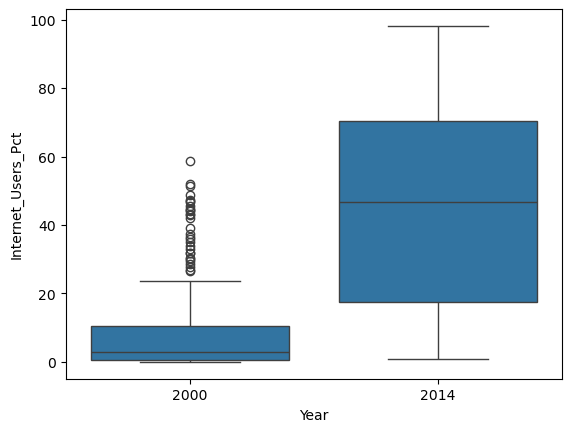

In [45]:
#Q18 Plot:
sns.boxplot( x=internet_decades["Year"], y=internet_decades["Internet_Users_Pct"])

In [46]:
#sns.displot( data=gdp_df[intuser_00to14["Internet_Users_Pct"]], kde=True ) *Create a graph

Question 19: For how many countries was the percentage of internet users below 5% in 2014?

In [48]:
intuser_countrybelow5 = internet_df[internet_df['Internet_Users_Pct'] < 5]
intuser_2014 = intuser_countrybelow5[intuser_countrybelow5['Year']==2014]
print(intuser_2014.count())

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64


In [49]:
gdp_afg = gdp_df[gdp_df['Country']=='Afghanistan']
print(gdp_afg.sort_values(by='Year')) 

        Country  Year  GDP_Per_Capita
19  Afghanistan  2002     1280.463171
18  Afghanistan  2003     1292.333437
17  Afghanistan  2004     1260.060581
16  Afghanistan  2005     1352.320627
15  Afghanistan  2006     1366.993146
14  Afghanistan  2007     1528.344578
13  Afghanistan  2008     1556.844452
12  Afghanistan  2009     1823.742614
11  Afghanistan  2010     2026.163818
10  Afghanistan  2011     1961.096317
9   Afghanistan  2012     2122.830759
8   Afghanistan  2013     2165.340915
7   Afghanistan  2014     2144.449634
6   Afghanistan  2015     2108.714173
5   Afghanistan  2016     2101.422187
4   Afghanistan  2017     2096.093111
3   Afghanistan  2018     2060.698973
2   Afghanistan  2019     2079.921861
1   Afghanistan  2020     1968.341002
0   Afghanistan  2021     1517.016266


Question 20: Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [51]:
gdp_and_internet_use = gdp_df.merge(internet_df, how="outer",on=["Country","Year"])
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  1990             NaN            0.000000
1     Afghanistan  2001             NaN            0.004723
2     Afghanistan  2002     1280.463171            0.004561
3     Afghanistan  2003     1292.333437            0.087891
4     Afghanistan  2004     1260.060581            0.105809
...           ...   ...             ...                 ...
9107     Zimbabwe  2018     2399.621551           25.000000
9108     Zimbabwe  2019     2203.396810           26.588300
9109     Zimbabwe  2020     1990.319419           29.298600
9110     Zimbabwe  2021     2115.144555           32.461600
9111     Zimbabwe  2022     2143.237574           32.561500

[9112 rows x 4 columns]


Question 21: Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [58]:
#Without FacetGrid, practice
gdpinternet_top3 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdpinternet_top3.nlargest(3, 'Internet_Users_Pct', keep='first')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.158
2780,Falkland (Malvinas) Islands,2014,NaN,97.600
794,Bermuda,2014,77361.104881,96.800


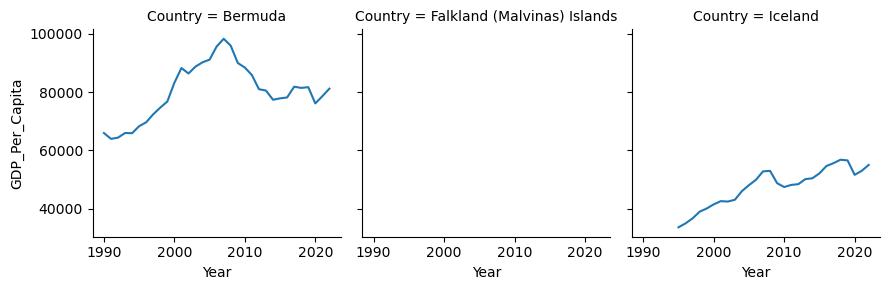

In [74]:
gdpinternet_top3compare = gdp_and_internet_use[gdp_and_internet_use['Country'].isin({'Iceland', 'Falkland (Malvinas) Islands', 'Bermuda'})]
sns.FacetGrid(gdpinternet_top3compare, col='Country').map(sns.lineplot, 'Year', 'GDP_Per_Capita')

Question 22: Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [86]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
14                    Afghanistan  2014     2144.449634              7.0000
46    Africa Eastern and Southern  2014     3642.875373                 NaN
79     Africa Western and Central  2014     4146.994622                 NaN
112                       Albania  2014    11586.817446             54.3000
145                       Algeria  2014    11561.259795             29.5000
...                           ...   ...             ...                 ...
8978           West Bank and Gaza  2014     5967.073437                 NaN
9011                        World  2014    15120.730322                 NaN
9039                        Yemen  2014             NaN             22.5500
9070                       Zambia  2014     3375.941270              6.5000
9103                     Zimbabwe  2014     2316.954536             16.3647

[284 rows x 4 columns]


Question 23: Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

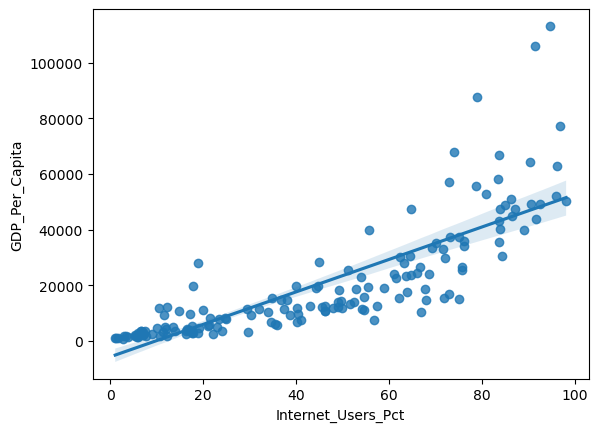

In [78]:
#sns.boxplot( x=gdp_and_internet_use_2014["GDP_Per_Capita"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])
sns.regplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')

In [80]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita']>100000])

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
5023        Luxembourg  2014   113313.578898             94.6702
5057  Macao SAR, China  2014   151616.402364                 NaN
6780             Qatar  2014   106141.326189             91.4900


Question 24: Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [88]:
gdp_and_internet_use_2014.insert(4, 'GDP_group', pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],3,labels=['Low','Medium','High']))
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
14,Afghanistan,2014,2144.449634,7.0000,Low
46,Africa Eastern and Southern,2014,3642.875373,NaN,Low
79,Africa Western and Central,2014,4146.994622,NaN,Low
112,Albania,2014,11586.817446,54.3000,Medium
145,Algeria,2014,11561.259795,29.5000,Medium
...,...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN,Low
9011,World,2014,15120.730322,NaN,Medium
9039,Yemen,2014,NaN,22.5500,NaN
9070,Zambia,2014,3375.941270,6.5000,Low


Question 25: Stretch Question: How does the median internet users percentage compare for the three gdp groups?

<Axes: xlabel='GDP_group', ylabel='Internet_Users_Pct'>

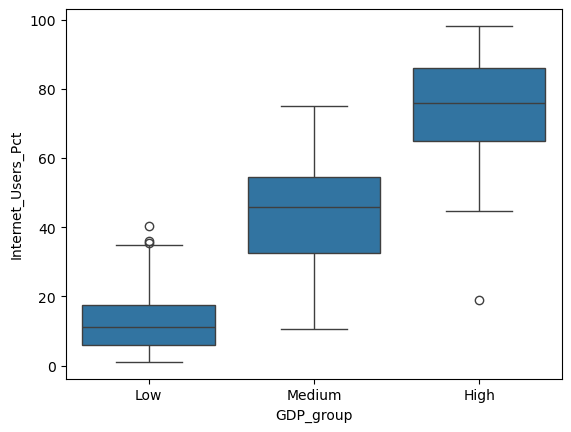

In [92]:
sns.boxplot( x=gdp_and_internet_use_2014["GDP_group"], y=gdp_and_internet_use_2014["Internet_Users_Pct"])